# Retail Sales Analysis

## 1. Import Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load the Retail Sales Dataset


In [2]:
# Loading the retail sales dataset
retail_sales = pd.read_csv("retail_sales_dataset.csv", index_col="Transaction ID")
retail_sales.head()


,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 3. Checking Data Types and Correcting Inconsistencies


In [3]:
# Checking for data types and correcting any inconsistencies
retail_sales.info()

# Converting "Date" to datetime data type
retail_sales["Date"] = pd.to_datetime(retail_sales["Date"])
retail_sales.head()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1000 non-null   object
 1   Customer ID       1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 70.3+ KB


,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Transaction ID,,,,,,,,
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 4. Missing Data Handling

In [4]:
# Checking for missing values
retail_sales_missing = retail_sales.isnull().sum()
print("Missing Values:\n", retail_sales_missing)

Missing Values:
 Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


## 5. Checking for Duplicates


In [5]:
# Checking for duplicate rows
duplicates = retail_sales.duplicated().sum()
print("Duplicate Rows:", duplicates)


Duplicate Rows: 0


## 6. Descriptive Statistics


In [6]:
# Calculating basic statistics
retail_sales_mean = retail_sales[["Quantity", "Price per Unit", "Total Amount"]].mean()
retail_sales_median = retail_sales[["Quantity", "Price per Unit", "Total Amount"]].median()
retail_sales_mode = retail_sales[["Quantity", "Price per Unit", "Total Amount"]].mode().iloc[0]
retail_sales_std_dev = retail_sales[["Quantity", "Price per Unit", "Total Amount"]].std()

# Print Descriptive Statistics
print("Mean:\n", retail_sales_mean)
print("\nMedian:\n", retail_sales_median)
print("\nMode:\n", retail_sales_mode)
print("\nStandard Deviation:\n", retail_sales_std_dev)


Mean:
 Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median:
 Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

Mode:
 Quantity           4
Price per Unit    50
Total Amount      50
Name: 0, dtype: int64

Standard Deviation:
 Quantity            1.132734
Price per Unit    189.681356
Total Amount      559.997632
dtype: float64


## 7. Pairplot of Numerical Features


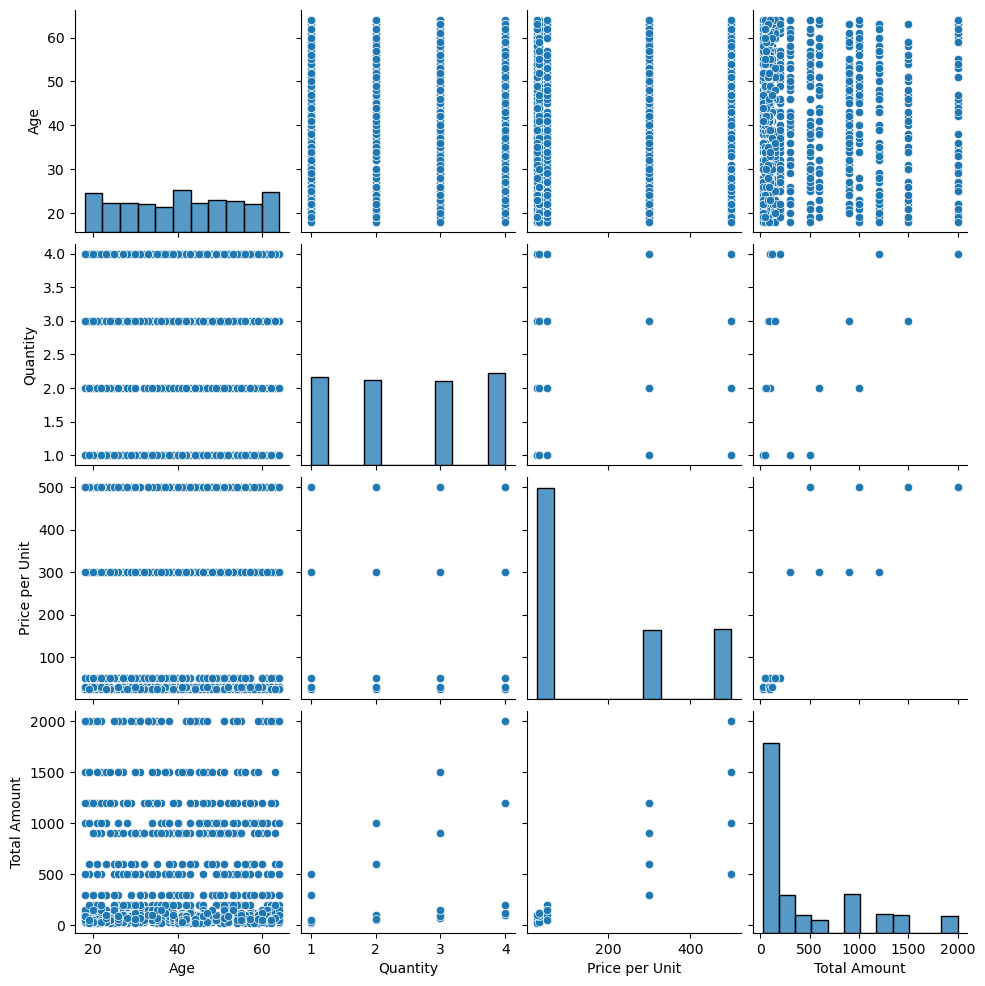

In [7]:
sns.pairplot(data=retail_sales)


## 8. Time Series Analysis


C:\Users\kchuc\AppData\Local\Temp\ipykernel_9920\1791114960.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = retail_sales.resample("Y").sum()
C:\Users\kchuc\AppData\Local\Temp\ipykernel_9920\1791114960.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = retail_sales.resample("Q").sum()
C:\Users\kchuc\AppData\Local\Temp\ipykernel_9920\1791114960.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = retail_sales.resample("M").sum()


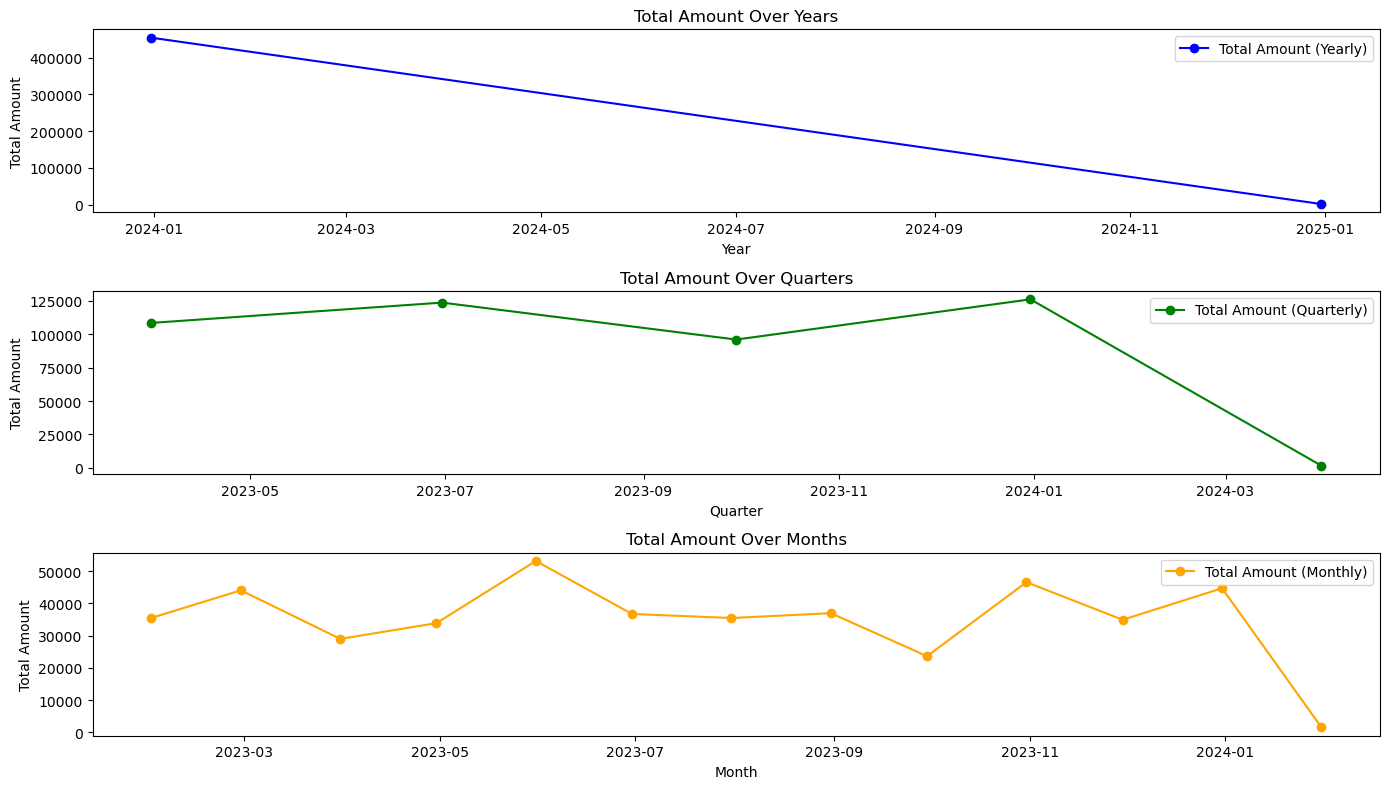

In [8]:
# Setting "Date" as the index for time series analysis
retail_sales.set_index("Date", inplace=True)

# Converting relevant columns to numeric type
numeric_columns = ["Total Amount", "Quantity", "Price per Unit"]
retail_sales[numeric_columns] = retail_sales[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Resample data for yearly, quarterly, and monthly frequency
yearly_data = retail_sales.resample("Y").sum()
quarterly_data = retail_sales.resample("Q").sum()
monthly_data = retail_sales.resample("M").sum()

# Plotting Total Amount for each frequency
plt.figure(figsize=(14, 8))

# Yearly Plot
plt.subplot(3, 1, 1)
plt.plot(yearly_data.index, yearly_data["Total Amount"], marker="o", linestyle="-", label="Total Amount (Yearly)", color="blue")
plt.title("Total Amount Over Years")
plt.xlabel("Year")
plt.ylabel("Total Amount")
plt.legend()

# Quarterly Plot
plt.subplot(3, 1, 2)
plt.plot(quarterly_data.index, quarterly_data["Total Amount"], marker="o", linestyle="-", label="Total Amount (Quarterly)", color="green")
plt.title("Total Amount Over Quarters")
plt.xlabel("Quarter")
plt.ylabel("Total Amount")
plt.legend()

# Monthly Plot
plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, monthly_data["Total Amount"], marker="o", linestyle="-", label="Total Amount (Monthly)", color="orange")
plt.title("Total Amount Over Months")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.legend()

# Adjust layout for better appearance
plt.tight_layout()
plt.show()


## 9. Customer Demographics


C:\Users\kchuc\AppData\Local\Temp\ipykernel_9920\1804331467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=retail_sales, palette="Set2")


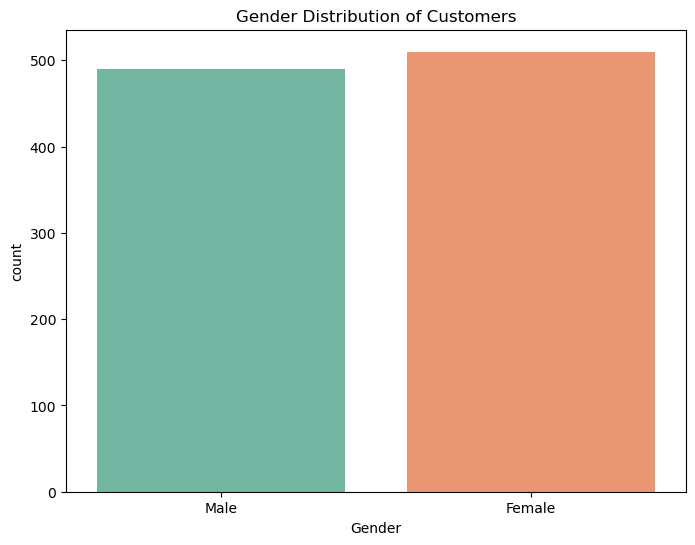

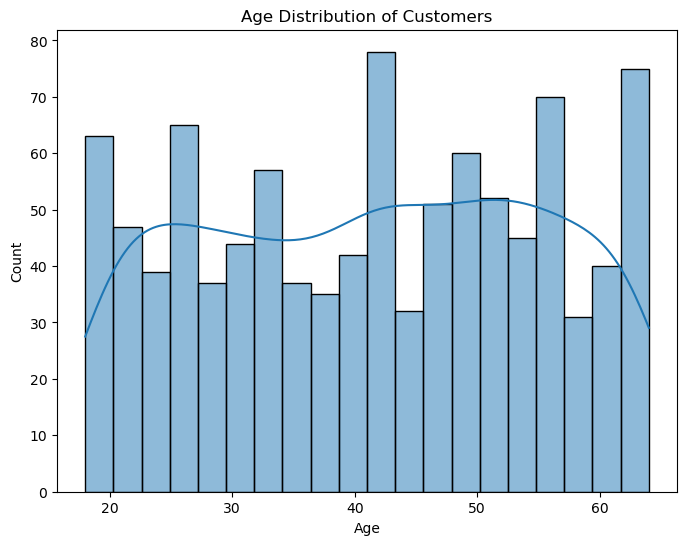

In [22]:
# Gender distribution with different colors
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", data=retail_sales, palette="Set2") 
plt.title("Gender Distribution of Customers")
plt.show()

# Age distribution with different colors
plt.figure(figsize=(8, 6))
sns.histplot(x="Age", data=retail_sales, bins=20, kde=True) 
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.show()


## 10. Analyzing Purchasing Behavior


C:\Users\kchuc\AppData\Local\Temp\ipykernel_9920\4116542725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product Category", y="Total Amount", data=retail_sales, palette="Set2")


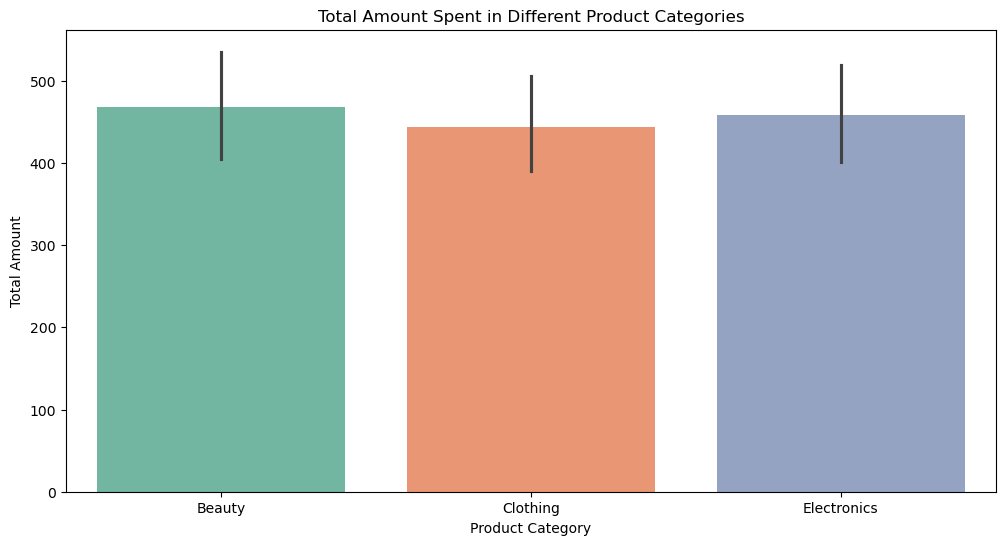

In [19]:
# Total amount spent in different product categories
plt.figure(figsize=(12, 6))
sns.barplot(x="Product Category", y="Total Amount", data=retail_sales, palette="Set2")
plt.title("Total Amount Spent in Different Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")
plt.show()
